In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import os
from scipy import stats


In [60]:
df_clean = pd.read_csv(r"data\cleaned_apartment.csv", index_col = 0)

# Filter the DataFrame for rows with "apartment" type in the "property_type" column
df_apartment = df_clean[df_clean["property_type"] == "APARTMENT"]
df_apartment.shape


(9646, 32)

In [61]:
df_apartment.dtypes

url                         object
id                         float64
region                      object
province                    object
locality                    object
zip_code                     int64
Longitude                  float64
Latitude                   float64
property_type               object
property_subtype            object
price                      float64
number_rooms               float64
living_area                float64
kitchen                     object
furnished                  float64
fireplace                  float64
terrace                      int64
terrace_area               float64
garden                       int64
garden_area                float64
surface_land                object
number_facades              object
swimming_pool               object
building_state              object
energy_type                 object
EPC_score                   object
EnergyConsumptionPerSqm     object
parking_outdoor            float64
parking_indoor      

**Graphs**

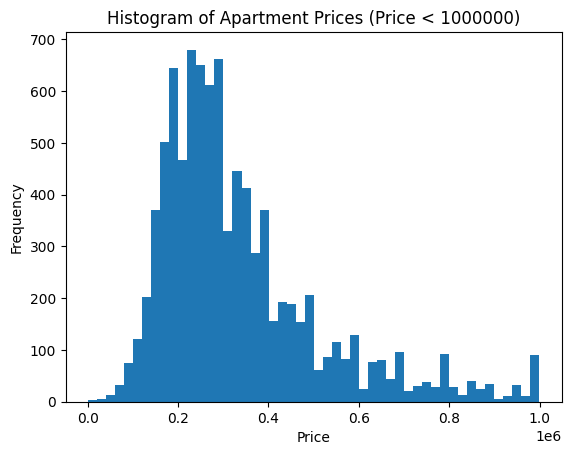

In [62]:
# Plot histogram for the 'price' column in the subset of the DataFrame where 'price' is less than 1000000
plt.hist(df_apartment[df_apartment['price'] < 1000000]['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Apartment Prices (Price < 1000000)')
plt.show()


In [63]:
# Filter the DataFrame for prices less than 1000000
subset_df = df_apartment[df_apartment['price'] < 1000000]['price']

# Calculate mean, median, and mode
mean_price = subset_df.mean()
median_price = subset_df.median()
mode_price = subset_df.mode()[0]

# Create a histogram
fig = go.Figure()

# Add a histogram trace
fig.add_trace(go.Histogram(x=subset_df, name='Price'))

# Add vertical lines for mean, median, and mode
fig.add_vline(x=mean_price, line_dash="dash", line_color="magenta", name="Mean")
fig.add_vline(x=median_price, line_dash="dash", line_color="blue", name="Median")
fig.add_vline(x=mode_price, line_dash="dash", line_color="green", name="Mode")

# Update layout
fig.update_layout(
    title='Distribution of Prices for Apartments (Price < 1000000)',
    xaxis_title='Price',
    yaxis_title='Number of Apartments',
    bargap=0.1  # Gap between bars
)

# Show the plot
fig.show()




In the above histogram we can see that the bin with the price between 200,000 to 400,000 has the most numbers of observation.

<Axes: xlabel='price'>

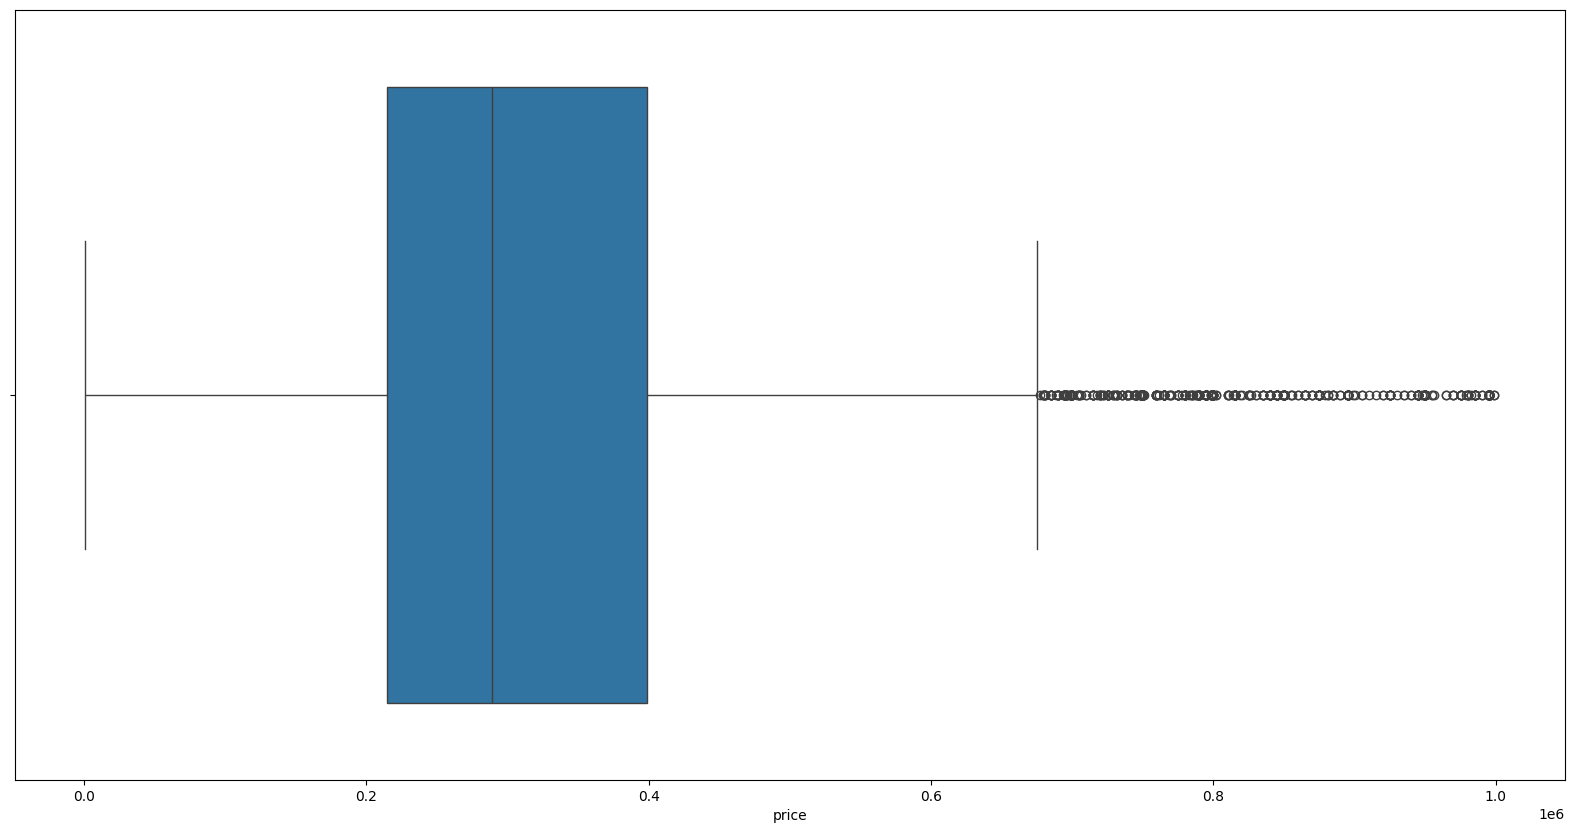

In [64]:
# Create boxplot for price
plt.figure(figsize=(20,10))
sns.boxplot(x=df_apartment[df_apartment['price'] < 1000000]['price'])

a lot of aparments over 650,000 shows as outliers in the box plot.


## **Correlations**

### **Numerical Variables**

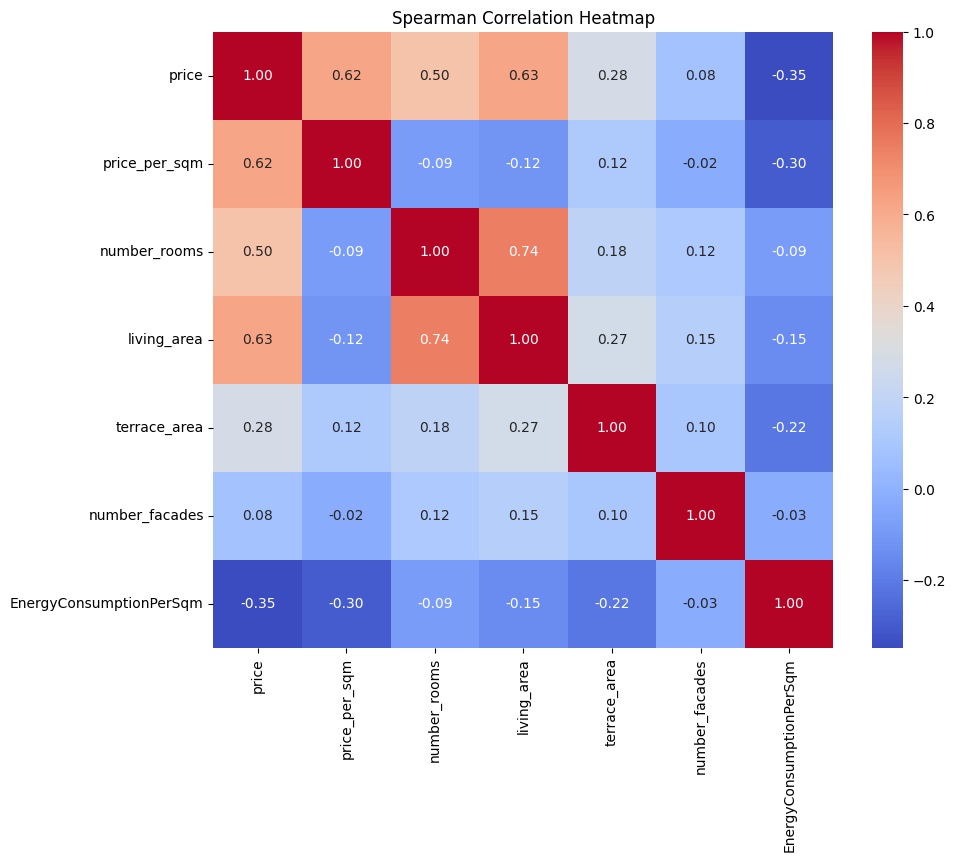

In [65]:
# Specify numerical columns
numerical_columns = ['price', 'price_per_sqm', 'number_rooms', 'living_area', 'terrace_area', 'number_facades', 'EnergyConsumptionPerSqm']

# Select numerical data
numerical_df = df_apartment[numerical_columns]

# Calculate Spearman correlation matrix
correlation_matrix = numerical_df.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


#### - price and living area

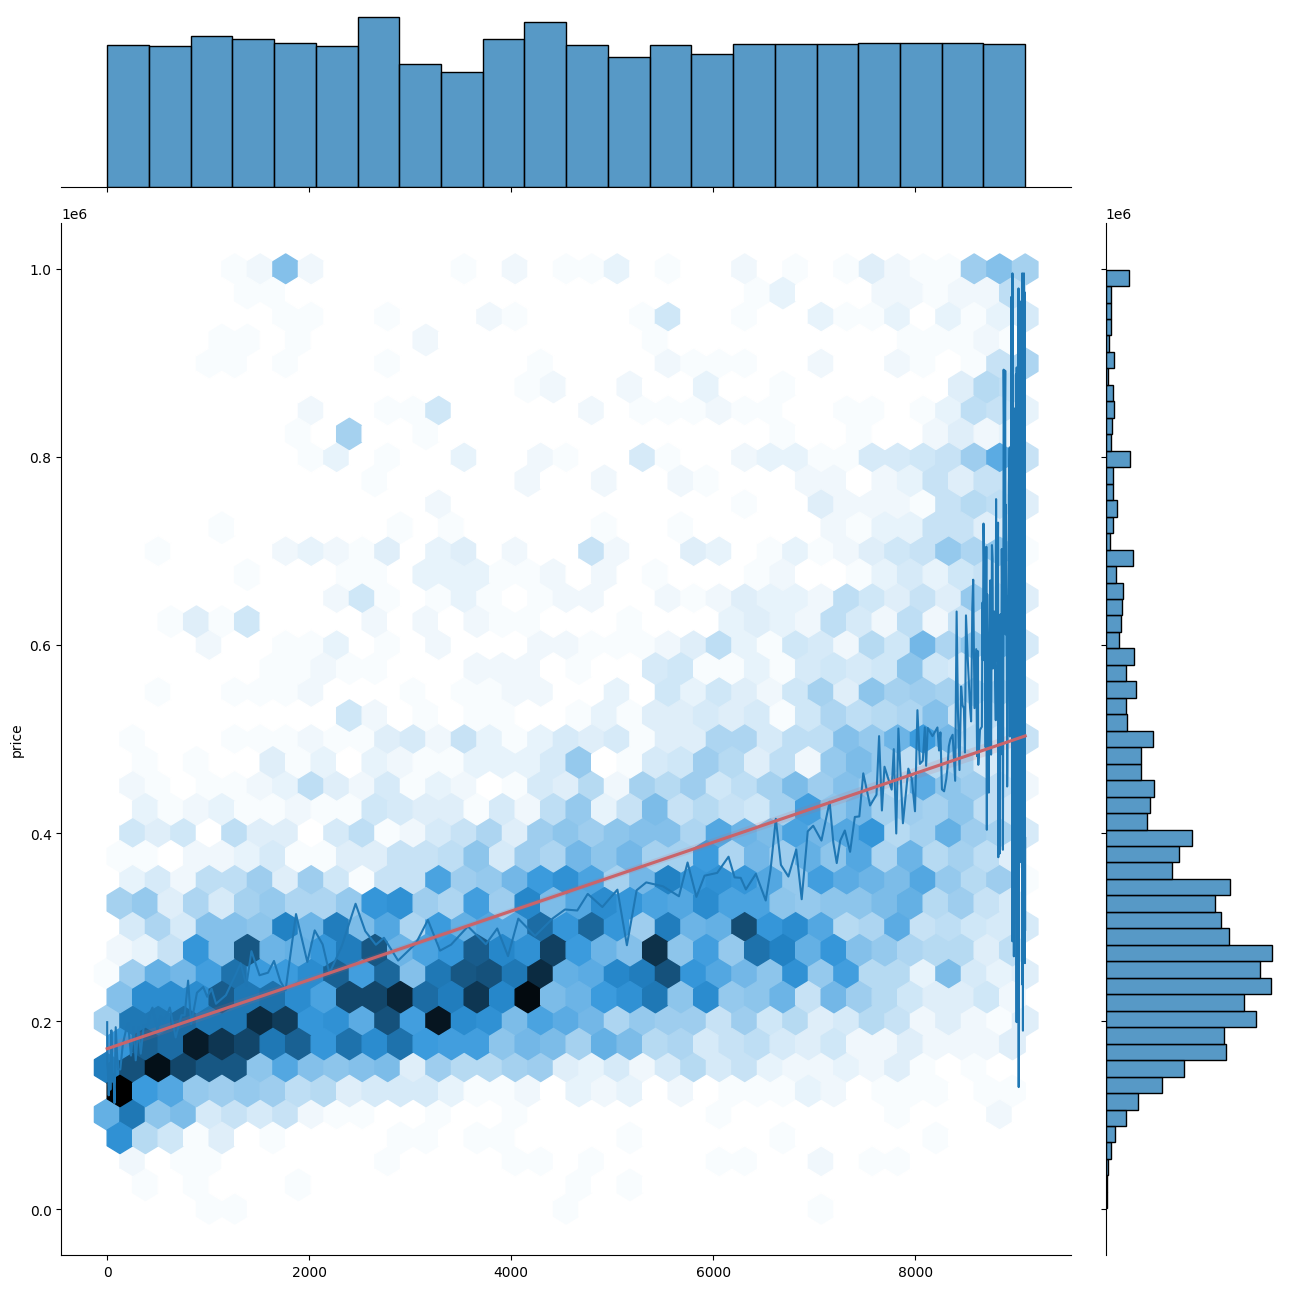

In [88]:
# Filter the DataFrame for prices under 1 million
df_filtered = df_apartment[df_apartment['price'] < 1000000]

# Create the joint plot
plot = sns.jointplot(x=stats.rankdata(df_filtered['living_area']), 
                     y='price', data=df_filtered,
                     height=13, kind="hex")

# Add a line plot of living area vs. price
sns.lineplot(data=df_filtered, 
             x=stats.rankdata(df_filtered['living_area']), 
             y='price', errorbar=None, ax=plot.ax_joint)

# Add a regression plot of living area vs. price
sns.regplot(data=df_filtered, 
            x=stats.rankdata(df_filtered['living_area']), 
            y='price', scatter=False, robust=False, color='#c9646a', ax=plot.ax_joint)

# Show the plot
plt.show()

# Save the plot
plot.savefig(r'output/price_living_area_filtered.svg', dpi=300)


The Price of a house is correlated with its area: The higher is the area, higher is the price.

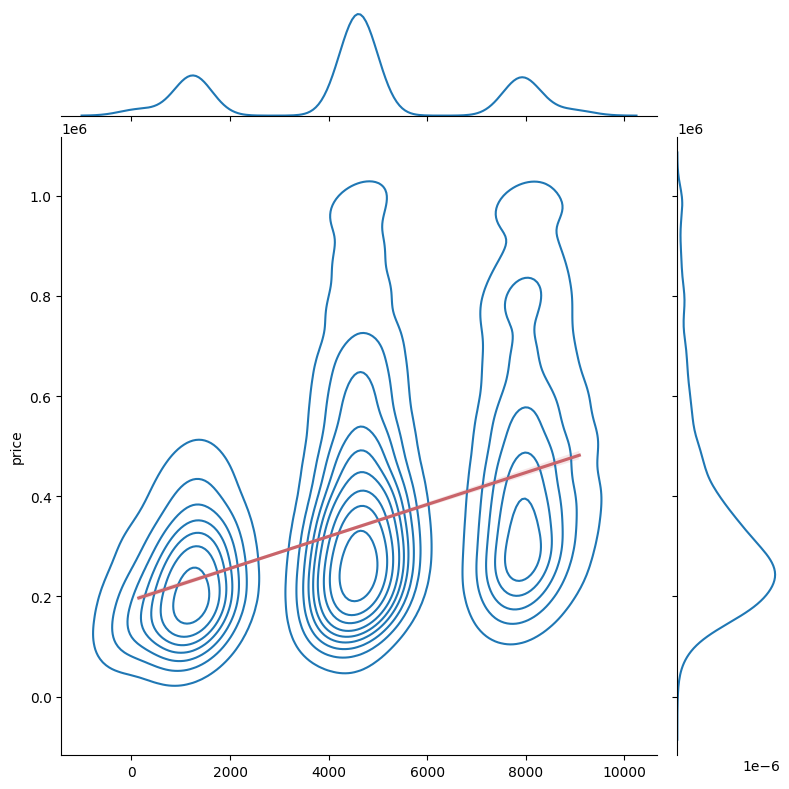

In [93]:
# Filter the DataFrame for prices under a certain threshold (e.g., 1 million)
df_filtered_price = df_apartment[df_apartment['price'] < 1000000]

# Create the joint plot with KDE for filtered data
plot = sns.jointplot(x=stats.rankdata(df_filtered_price['number_rooms']), 
                     y=df_filtered_price['price'], 
                     height=8, 
                     kind="kde")

# Add a regression line
plot.plot_joint(sns.regplot, color='#c9646a', scatter=False, robust=False)

# Show the plot
plt.show()



### **Categorical Variables**

#### - EPC score

<Axes: xlabel='EPC_score', ylabel='count'>

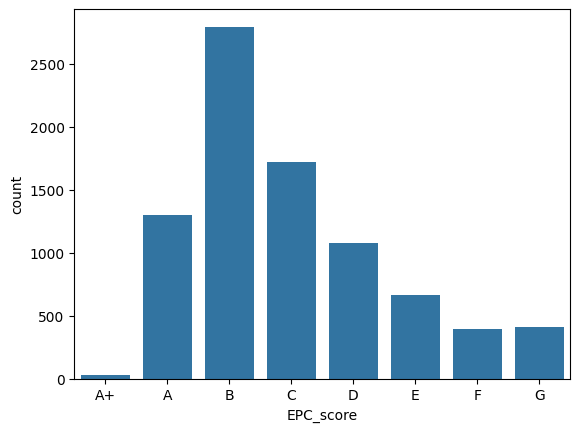

In [ ]:
ordered_EPC = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']

#list of EPC_scores, excluding "A++" and "Not specified"
ordered_EPC_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G'] 

sns.countplot(x="EPC_score", data = df_apartment, order = ordered_EPC_aplus_to_g)

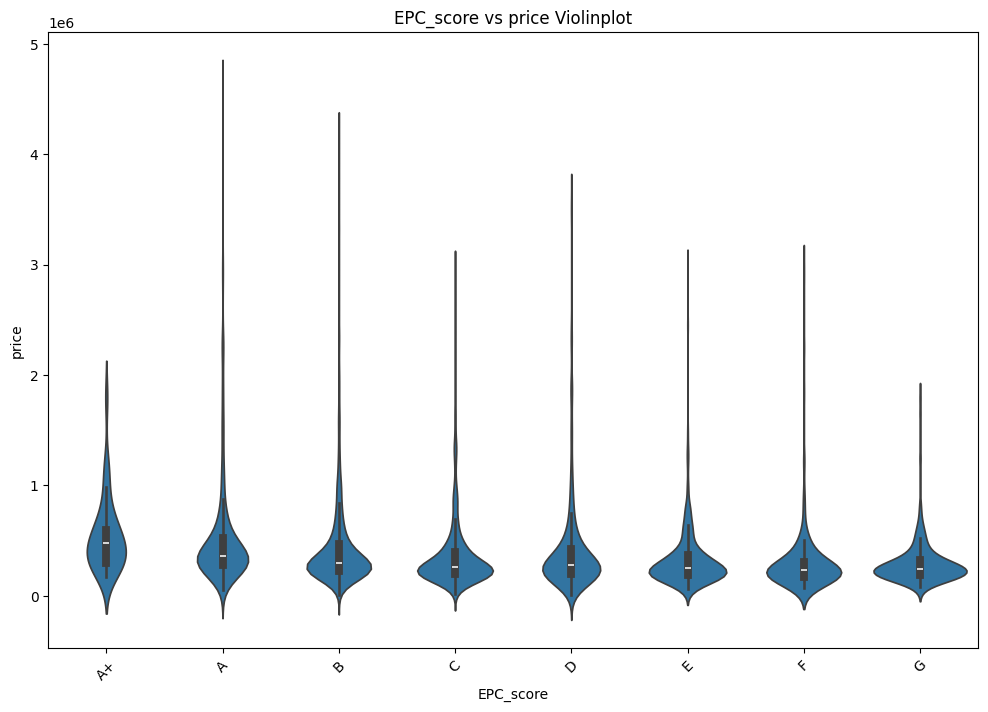

In [ ]:
def categorical_numeric_correlation_violin(df_apartment, categorical_column, numeric_column, order=None):
    # Filter out rows where the categorical column is 'None'
    df_filtered = df_apartment[df_apartment[categorical_column] != 'None']
    
    # Sort categories alphabetically if order is not specified
    if order is None:
        categories_sorted = df_filtered[categorical_column].unique()
        categories_sorted.sort()
        order = categories_sorted
    
    # Create violin plots for each category
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=categorical_column, y=numeric_column, data=df_filtered, order=order)
    plt.title(f'{categorical_column} vs {numeric_column} Violinplot')
    plt.xlabel(categorical_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# Example usage with specified order
ordered_EPC_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
categorical_numeric_correlation_violin(df_apartment, 'EPC_score', 'price', order=ordered_EPC_aplus_to_g)


[Text(0.5, 1.0, 'EPC_score versus Price'), Text(0, 0.5, 'Price per sqm in €')]

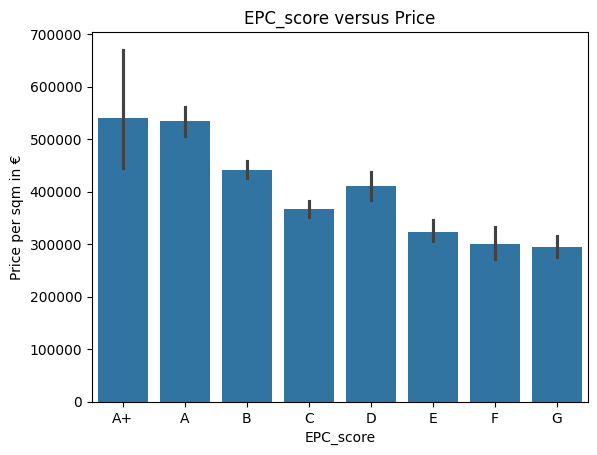

In [ ]:
sns.barplot(x="EPC_score", y="price", order=ordered_EPC_aplus_to_g,
             data=df_apartment).set(title = "EPC_score versus Price", ylabel='Price per sqm in €')

[Text(0.5, 1.0, 'EPC_score versus Price_per_sqm'),
 Text(0, 0.5, 'Price per sqm in €')]

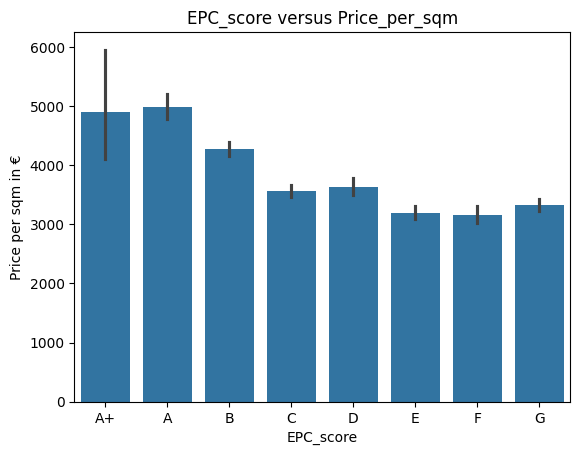

In [ ]:
sns.barplot(x="EPC_score", y="price_per_sqm", order=ordered_EPC_aplus_to_g,
             data=df_apartment).set(title = "EPC_score versus Price_per_sqm", ylabel='Price per sqm in €')

[Text(0.5, 1.0, 'EPC score versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

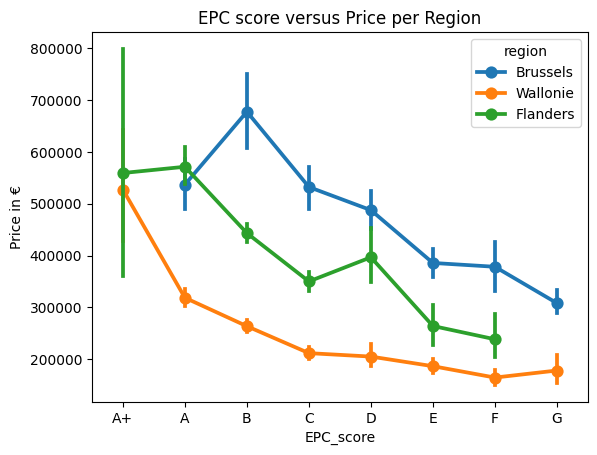

In [96]:
sns.pointplot(x="EPC_score", y="price", hue = "region",data=df_apartment, order=ordered_EPC_aplus_to_g).set(title = "EPC score versus Price per Region", ylabel='Price in €')

#### - Energy type

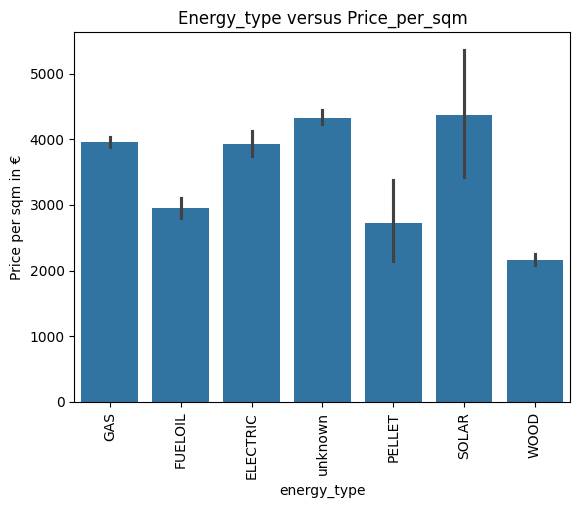

In [ ]:
# Create the bar plot
sns.barplot(x="energy_type", y="price_per_sqm", data=df_apartment)

# Set title and ylabel
plt.title("Energy_type versus Price_per_sqm")
plt.ylabel("Price per sqm in €")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()


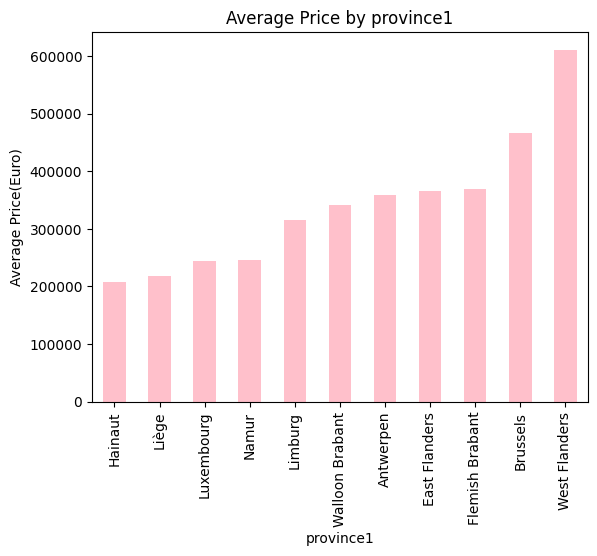

In [ ]:
# create a func for the Average Price by provinces of Belguim
def PlotBar_1(df):
    categorical_column = 'province1'
    numerical_column = 'price'
    grouped_df = df.groupby(categorical_column)[numerical_column].mean()
    grouped_df = grouped_df.sort_values()
    grouped_df.plot(kind='bar' ,color='pink')
    plt.xlabel(categorical_column)
    plt.ylabel('Average Price(Euro)')
    plt.title(f'Average Price by {categorical_column}')
    plt.savefig("output",dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return
PlotBar_1(df_apartment)

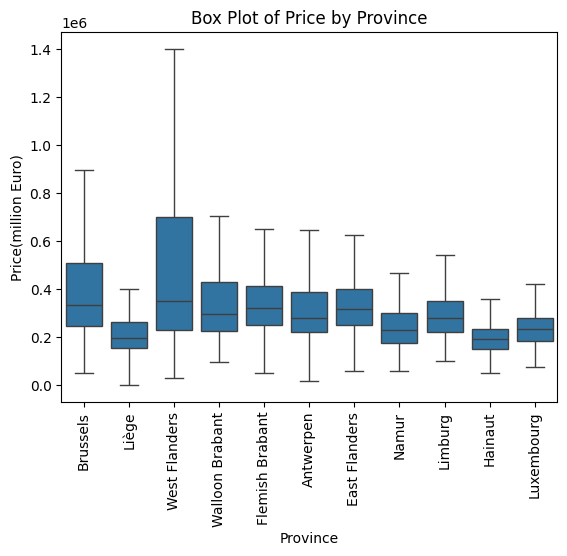

In [ ]:
def Price_by_province_boxplot(df):
    # Create a box plot using seaborn
    sns.boxplot(x='province1', y='price', data=df_apartment, showfliers=False)
    # Set the labels and title
    plt.xlabel('Province')
    plt.ylabel('Price(million Euro)')
    plt.title('Box Plot of Price by Province')
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90)
    plt.savefig('output', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
    return 
Price_by_province_boxplot(df_apartment)